In [584]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import linregress
from scipy.optimize import curve_fit
import scipy.constants as const
import pandas as pd
import dataframe_image as dfi

### Вольтамперная характеристика

In [585]:
current_voltage_characteristic = pd.DataFrame(
                                              {"I": np.array([0.5,1,2,2.5,3,4,4.5,4.8,3.5,1.5]),
                                              "V": np.array([35.07,33.77,31.15,30.72,30.39,30.43,30.41,30.38,30.42,31.7])}
                                              )
current_voltage_characteristic.I*=np.power(0.1,3)
current_voltage_characteristic

,I,V
0,0.0005,35.07
1,0.0010,33.77
2,0.0020,31.15
3,0.0025,30.72
4,0.0030,30.39
5,0.0040,30.43
6,0.0045,30.41
7,0.0048,30.38
8,0.0035,30.42
9,0.0015,31.70


In [586]:
CurrVoltageInterp_f = interp1d(current_voltage_characteristic.V.to_numpy(),
                               current_voltage_characteristic.I.to_numpy(),
                               kind = 'quadratic')

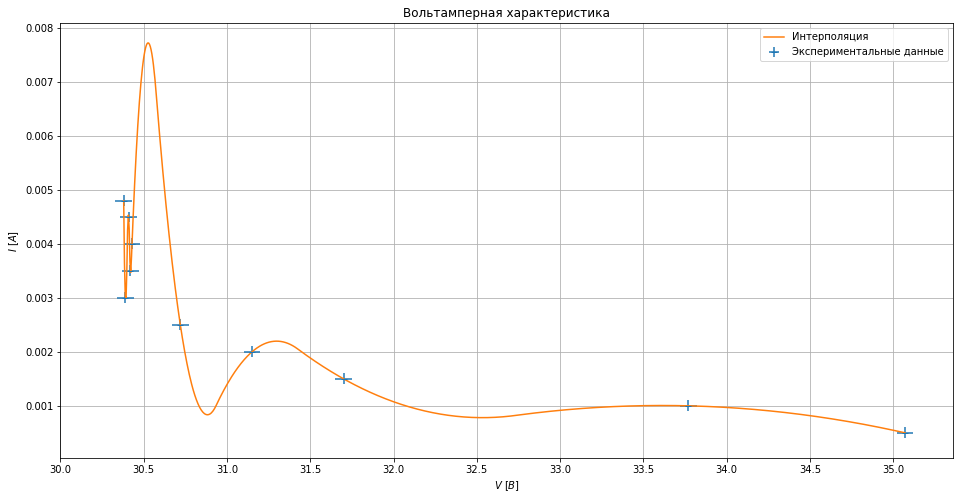

In [587]:
fig, ax = plt.subplots(figsize = (16,8))

vAxes = np.linspace(min(current_voltage_characteristic.V.to_numpy()),
                    max(current_voltage_characteristic.V.to_numpy()),
                    1000)
plt.errorbar(x = current_voltage_characteristic.V.to_numpy(),
             y = current_voltage_characteristic.I.to_numpy(),
             xerr = [0.05 for _ in range(len(current_voltage_characteristic.I.to_numpy()))],
             yerr = [0.1*np.power(0.1,3) for _ in range(len(current_voltage_characteristic.I.to_numpy()))],
             label = "Экспериментальные данные",
             fmt = '_')
plt.plot(vAxes,CurrVoltageInterp_f(vAxes),label = 'Интерполяция')
plt.title("Вольтамперная характеристика")
plt.ylabel(r"$I \ [А]$")
plt.xlabel(r"$ V \ [В]$")
plt.grid()
plt.xticks(np.arange(30,35.5,0.5))
plt.legend()
plt.show()

### Зондовые характеристики

##### Полученные данные

In [588]:
#данные для тока разряда пять миллиампер
#ток измеряется в микроамперах
data_5 = pd.DataFrame(
    {"I": np.array([121.63,125.16,123.07,118.77,110.3,96.82,83.62,67.41,47.59,22.8,5.18,-12.44,-36,-56,-72.8,-85.8,-99.5,-106.8,-110.7,-112.43,-109.09]),
    "U": np.array([24.951,22.035,18.951,16.035,12.943,10.029,7.995,6.036,4.085,1.95,0.53664,-2,-4.06,-6.02,-8.04,-10,-13.122,-16.02,-18.98,-22,-25])}
)
#точки для провдения ассимптот
dotsInterp_5 = (17,20)
data_5

,I,U
0,121.63,24.95100
1,125.16,22.03500
2,123.07,18.95100
3,118.77,16.03500
4,110.30,12.94300
5,96.82,10.02900
6,83.62,7.99500
7,67.41,6.03600
8,47.59,4.08500
9,22.80,1.95000


In [589]:
#3 мА
data_3 = pd.DataFrame(
    {
        "I": np.array([74.3,72.16,70,67.6,63.8,57.86,50.93,41.89,31,20,17,13.89,8.99,6.49,-64.39,-62.48,-60.5,-57.7,-55,-49,-43.03,-33.81,-22.83,-9.71,-1.93]),
        "U": np.array([25,22.03,19,16,12.84,10,7.9,5.91,4.1,2.5,2,1.5,0.88,0.5381,-25,-22,-19,-16,-13,-9.975,-8.07,-5.964,-4.04,-2.07,-1])
    }
)
dotsInterp_3 = (14,18)
data_3

,I,U
0,74.30,25.0000
1,72.16,22.0300
2,70.00,19.0000
3,67.60,16.0000
4,63.80,12.8400
5,57.86,10.0000
6,50.93,7.9000
7,41.89,5.9100
8,31.00,4.1000
9,20.00,2.5000


In [590]:
#1.5 мА
data_15 = pd.DataFrame(
    {
        "I": np.array([39.86,38.5,37.12,34.04,31.15,27.96,23.68,17.25,10,6,4.19,8.14,0,-1.68,-3.76,-5.78,-12.88,-18.9,-22.96,-26.22,-28.6,-30.08,-31.3,-32.4,-33.57]),
        "U": np.array([25,22.03,18.86,12.97,10,8,6.1,4.09,1.97,0.98,0.54,1.5,-0.5,-1.01,-1.5,-2.05,-4.04,-6.113,-8.024,-10.196,-13.062,-15.94,-19.05,-22.03,-25.06])
    }
)
dotsInterp_15 = (21,24)
data_15

,I,U
0,39.86,25.000
1,38.50,22.030
2,37.12,18.860
3,34.04,12.970
4,31.15,10.000
5,27.96,8.000
6,23.68,6.100
7,17.25,4.090
8,10.00,1.970
9,6.00,0.980


In [591]:
data = [data_5,data_3,data_15]
I = np.array([5,3,1.5]) #ток заряда в мА
pointsToInterp = [dotsInterp_5,dotsInterp_3,dotsInterp_15]
linearCff = []
dataInterpolationFunctions = []

In [592]:
#погрешноть измерения вольтметра в вольтаъх
voltageError = 0.1 
#погрешность измерения силы тока тока в мка
currentError = 1 

##### Графики

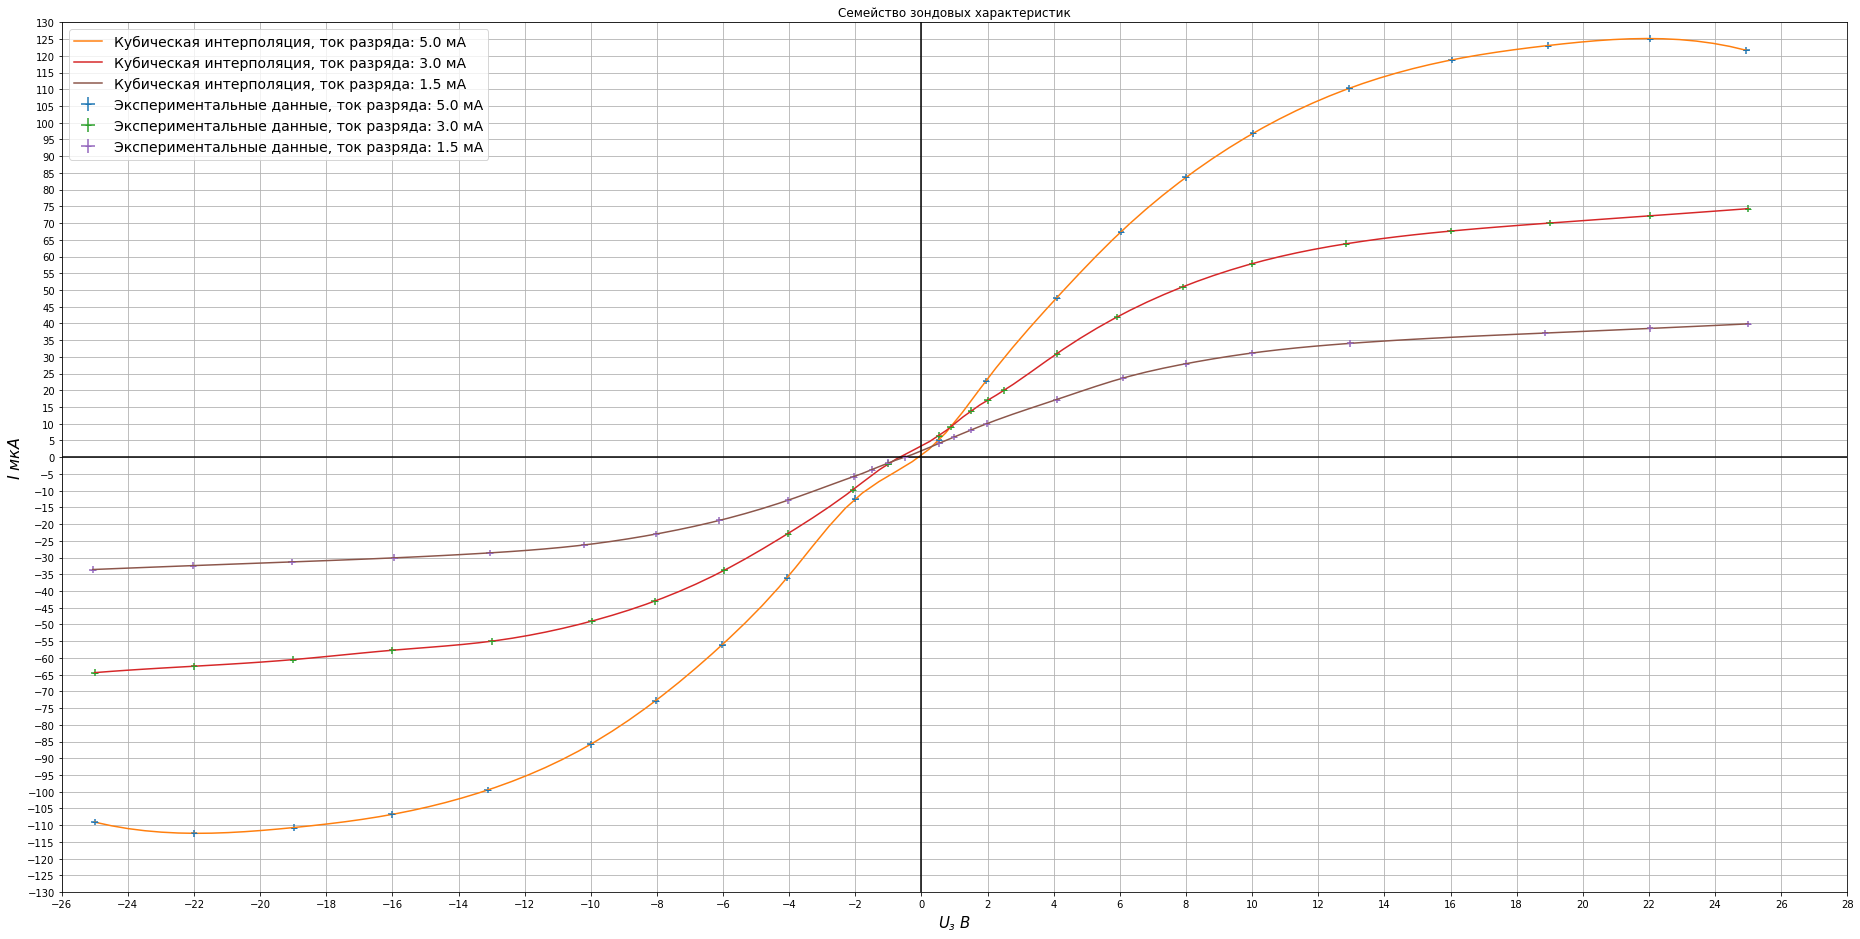

In [593]:
xLine = np.linspace(-26,26,200)
fig,ax = plt.subplots(figsize = (32,16))
for number,d in enumerate(data):
    dataInterpolationFunctions.append(interp1d(d.U.to_numpy(),d.I.to_numpy(),kind = 'cubic'))
    plt.errorbar(
                    x = d.U.to_numpy(),
                    y = d.I.to_numpy(),
                    xerr = [voltageError for _ in d.U.to_numpy()],
                    yerr = [currentError for _ in d.I.to_numpy()],
                    fmt = '_',
                    label = 'Экспериментальные данные, ток разряда: '+str(I[number])+" мА"
                )
    plt.plot(np.linspace(min(d.U.to_numpy()),max(d.U.to_numpy()),100),
            dataInterpolationFunctions[-1](np.linspace(min(d.U.to_numpy()),max(d.U.to_numpy()),100)),
            label = 'Кубическая интерполяция, ток разряда: '+ str(I[number])+ " мА"
            )
    MNK = linregress(d.U.to_numpy()[pointsToInterp[number][0]:pointsToInterp[number][1]],
                     d.I.to_numpy()[pointsToInterp[number][0]:pointsToInterp[number][1]])
    linearCff.append(MNK)
    # plt.plot(xLine,
    #          MNK.slope*xLine+MNK.intercept,
    #          linestyle = 'dashed',
    #          label = r'Ассимтота, '+ r'$I_{e'+str(I[number])+'} = '+str(abs(round(MNK.intercept,1)))+ r" \pm "+ str(abs(round(MNK.intercept_stderr,1)))+r" \ мкА, \ \alpha = " +str(abs(round(MNK.slope,2)))+ r" \pm "+ str(abs(round(MNK.stderr,2)))+"$")
    

plt.ylabel(r"$I \ мкА$",fontsize = 16)
plt.xlabel(r"$U_{з} \ В$",fontsize = 15)
plt.legend(fontsize = 14)
plt.title("Семейство зондовых характеристик",fontsize = 12)
plt.xticks(np.arange(-26,30,2))
plt.yticks(np.arange(-130,131,5))
plt.xlim(-26,28)
plt.ylim(-130,130)
plt.grid()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()
    

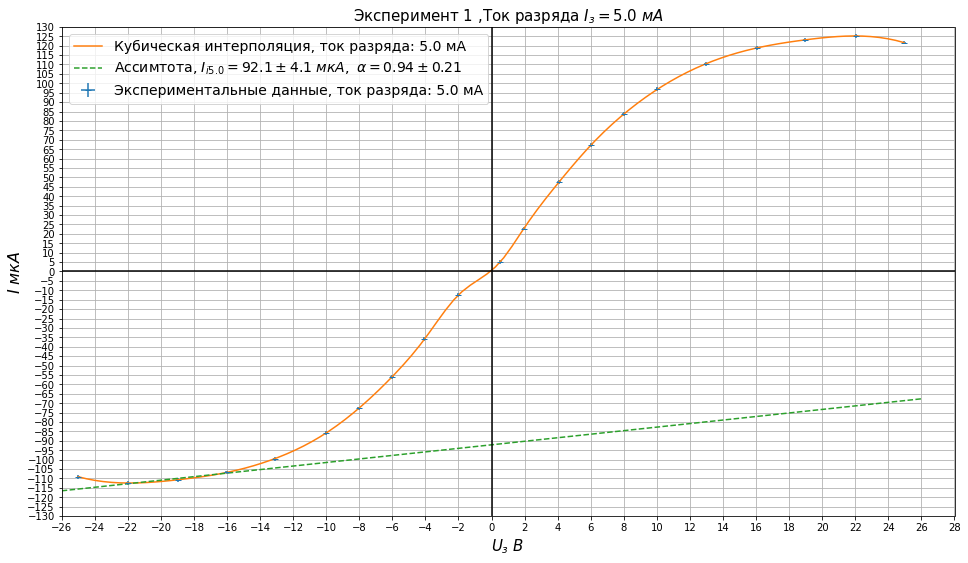

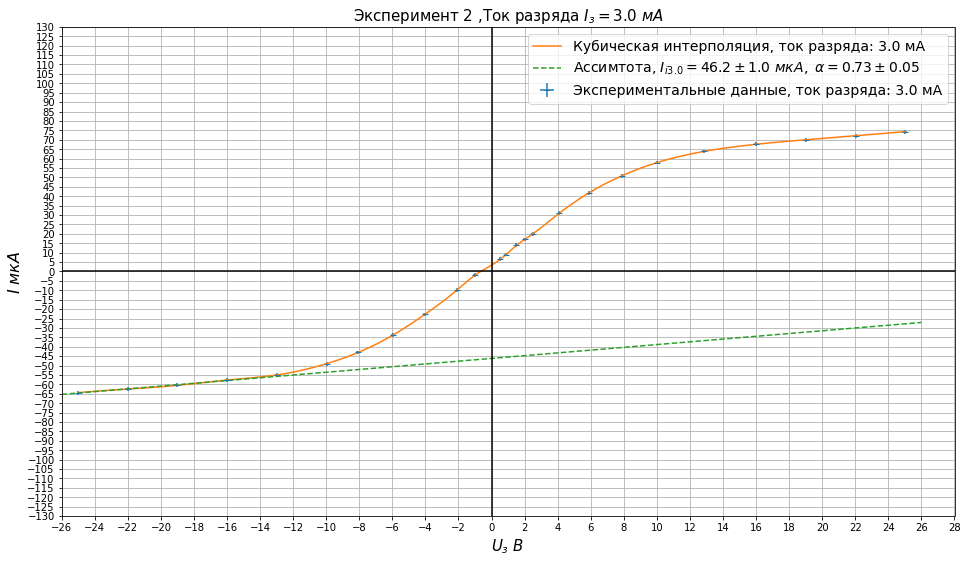

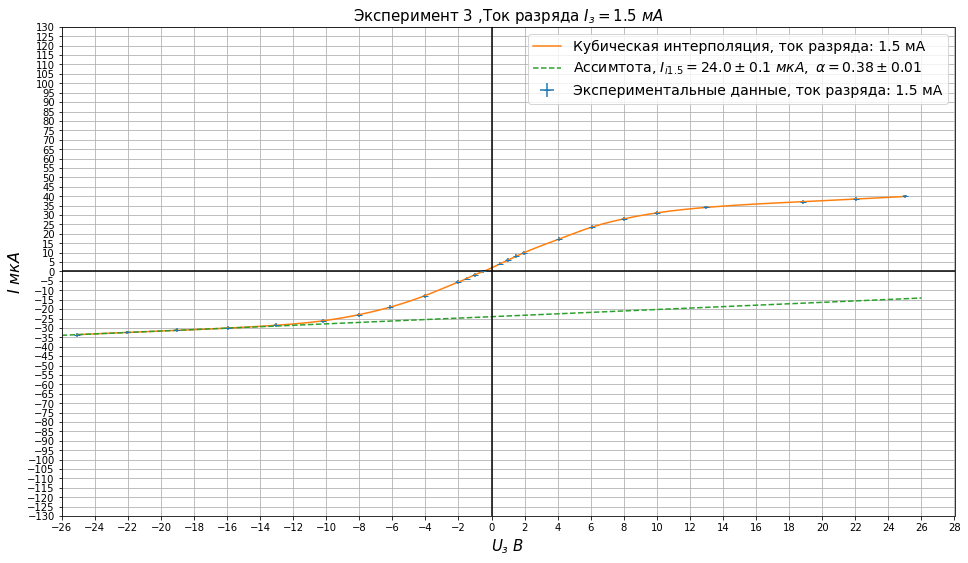

In [594]:
### Графики отдельно
xLine = np.linspace(-26,26,200)
for number,d in enumerate(data):
    fig,ax = plt.subplots(figsize = (16,9))
    plt.errorbar(
                    x = d.U.to_numpy(),
                    y = d.I.to_numpy(),
                    xerr = [voltageError for _ in d.U.to_numpy()],
                    yerr = [currentError for _ in d.I.to_numpy()],
                    fmt = '_',
                    label = 'Экспериментальные данные, ток разряда: '+str(I[number])+" мА"
                )
    plt.plot(np.linspace(min(d.U.to_numpy()),max(d.U.to_numpy()),100),
            dataInterpolationFunctions[number](np.linspace(min(d.U.to_numpy()),max(d.U.to_numpy()),100)),
            label = 'Кубическая интерполяция, ток разряда: '+ str(I[number])+ " мА"
            )
    MNK = linregress(d.U.to_numpy()[pointsToInterp[number][0]:pointsToInterp[number][1]],
                     d.I.to_numpy()[pointsToInterp[number][0]:pointsToInterp[number][1]])
    plt.plot(xLine,
             MNK.slope*xLine+MNK.intercept,
             linestyle = 'dashed',
             label = r'Асимтота, '+ r'$I_{i'+str(I[number])+'} = '+str(abs(round(MNK.intercept,1)))+ r" \pm "+ str(abs(round(MNK.intercept_stderr,1)))+r" \ мкА, \ \alpha = " +str(abs(round(MNK.slope,2)))+ r" \pm "+ str(abs(round(MNK.stderr,2)))+"$")
    plt.ylabel(r"$I \ мкА$",fontsize = 16)
    plt.xlabel(r"$U_{з} \ В$",fontsize = 15)
    plt.legend(fontsize = 14)
    plt.title('Эксперимент '+str(number+1)+" ,Ток разряда $I_{з} = "+str(I[number])+"\ мА$",fontsize = 15)
    plt.xticks(np.arange(-26,30,2))
    plt.yticks(np.arange(-130,131,5))
    plt.xlim(-26,28)
    plt.ylim(-130,130)
    plt.grid()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.show()

### Определение темпратуры $T_{e}$

$$
k T_e=\frac{1}{2} \frac{e I_{i \mathrm{H}}}{\left.\frac{d I}{d U}\right|_{U=0}}
$$

In [595]:
# данные, полученные по вышепостроенным графиками
Ii_n = np.array([l.intercept for l in linearCff])
IiError_n = np.array([l.intercept_stderr for l in linearCff])
# dIdU_n = np.array([l.slope for l in linearCff])
# dIdUError_n = np.array([l.stderr for l in linearCff])
dx_const = np.power(0.1,5)
dIdU_n = np.array([(IbyU(0)-IbyU(dx_const))/dx_const for IbyU in dataInterpolationFunctions])
dIdUError_n = [dx_const for _ in dIdU_n]

In [596]:
#рассчет T_e
# evInK = 11600
kMultTe_n = np.abs(Ii_n/(2*dIdU_n))
TeErrorIi_n = np.multiply(np.multiply(kMultTe_n,1/Ii_n),IiError_n)
TeErrordIdU_n = np.multiply(np.multiply(kMultTe_n,1/dIdU_n),dIdUError_n)
kMultTeError_n = np.sqrt(np.power(TeErrorIi_n,2)+np.power(TeErrordIdU_n,2))
print("k*Te: ")
print(*(kMultTe_n))
print(*(kMultTeError_n))
print("Te:")
print(*(const.e*kMultTe_n/const.k))
print(*(const.e*kMultTeError_n/const.k))

k*Te: 
6.278548490604048 4.45339687986709 2.898956443123943
0.2806692741579741 0.10037299147851102 0.015456021100959259
Te:
72859.52973624557 51679.52479487224 33640.992577816156
3257.0316781285183 1164.7801985265728 179.35967695314216


In [597]:
result_data = pd.DataFrame(
    {
        r"$I_{з} \ [мА]$": I,
        r"$T_{e} [K]$": const.e*kMultTe_n/const.k,
        r"$\Delta T_{e}$ ":const.e*kMultTeError_n/const.k
    }
)
result_data

,$I_{з} \ [мА]$,$T_{e} [K]$,$\Delta T_{e}$
0,5.0,72859.529736,3257.031678
1,3.0,51679.524795,1164.780199
2,1.5,33640.992578,179.359677


### Рассчёт концентрации электронов

$$
I_{i \mathrm{H}}=0,4 n_e e S \sqrt{\frac{2 k T_e}{m_i}}
$$

In [598]:
mi_n = 22*1.66*np.power(0.1,24)*np.power(0.1,3)
d_n,l_n = 0.2*np.power(0.1,3),5.2*np.power(0.1,3)
S_n = np.pi*d_n*l_n
ne_n = np.abs(Ii_n*np.sqrt(mi_n)/(0.4*np.sqrt(2*kMultTe_n)*S_n*const.e))
neError_n = np.sqrt(np.power(ne_n*IiError_n/Ii_n,2)+
                    np.power(ne_n*kMultTeError_n/(2*kMultTe_n),2))
result_data[r"$n_{e} \ [м^{-1}]$"] = ne_n
result_data[r"$\Delta n_{e} \ [м^{-1}]$"] = neError_n
result_data

,$I_{з} \ [мА]$,$T_{e} [K]$,$\Delta T_{e}$,$n_{e} \ [м^{-1}]$,$\Delta n_{e} \ [м^{-1}]$
0,5.0,72859.529736,3257.031678,2.372385e+13,1.185702e+12
1,3.0,51679.524795,1164.780199,1.412840e+13,3.560193e+11
2,1.5,33640.992578,179.359677,9.103516e+12,5.426504e+10


### Графики $T_{e}(I_{р}), \ n_{e}(I_{р})$

In [599]:
Te_n = const.e*kMultTe_n/const.k
TeError_n = const.e*kMultTeError_n/const.k

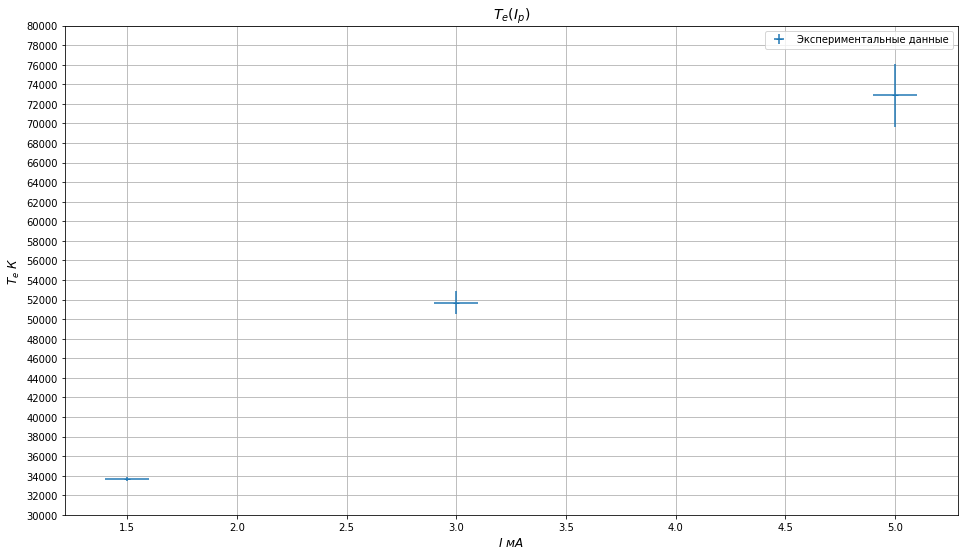

In [600]:
fig, ax = plt.subplots(figsize = (16,9))

plt.errorbar(
             x = I,
             y = Te_n,
             xerr = [0.1 for _ in I],
             yerr = TeError_n,
             fmt = '_',
             label = "Экспериментальные данные"
)

plt.xlabel(r"$I \ мА$",fontsize = 12)
plt.ylabel(r"$T_{e} \ К$",fontsize = 12)
plt.title(r"$T_{e}(I_{р})$",fontsize = 14)
plt.legend()

plt.grid()
plt.yticks(np.arange(30,81,2)*np.power(10,3))
plt.show()

### Рассчет частоты колебаний электронов

In [601]:
w_n = np.sqrt(ne_n*np.power(const.e,2)/(const.epsilon_0*const.electron_mass))
wError_n = neError_n*w_n/(2*ne_n)
result_data[r"$w_n \ \frac{рад}{с}$"] = w_n
result_data[r"$\Delta w_n$"] = wError_n
result_data

,$I_{з} \ [мА]$,$T_{e} [K]$,$\Delta T_{e}$,$n_{e} \ [м^{-1}]$,$\Delta n_{e} \ [м^{-1}]$,$w_n \ \frac{рад}{с}$,$\Delta w_n$
0,5.0,72859.529736,3257.031678,2.372385e+13,1.185702e+12,2.747793e+08,6.866647e+06
1,3.0,51679.524795,1164.780199,1.412840e+13,3.560193e+11,2.120499e+08,2.671705e+06
2,1.5,33640.992578,179.359677,9.103516e+12,5.426504e+10,1.702143e+08,5.073143e+05


### Рассчет Дебаевского радиуса

$$
r_D=\sqrt{\frac{\varepsilon_0 k T_i}{n e^2}}
$$

In [602]:
rD_n = np.sqrt(const.epsilon_0*const.k*Te_n/(ne_n*np.power(const.e,2)))
rDError_n = rD_n/(2*Te_n)
result_data[r"$r_D \ [м]$"] = rD_n
result_data[r"$\Delta r_D$"] = rDError_n
result_data

,$I_{з} \ [мА]$,$T_{e} [K]$,$\Delta T_{e}$,$n_{e} \ [м^{-1}]$,$\Delta n_{e} \ [м^{-1}]$,$w_n \ \frac{рад}{с}$,$\Delta w_n$,$r_D \ [м]$,$\Delta r_D$
0,5.0,72859.529736,3257.031678,2.372385e+13,1.185702e+12,2.747793e+08,6.866647e+06,0.003824,2.624460e-08
1,3.0,51679.524795,1164.780199,1.412840e+13,3.560193e+11,2.120499e+08,2.671705e+06,0.004174,4.038033e-08
2,1.5,33640.992578,179.359677,9.103516e+12,5.426504e+10,1.702143e+08,5.073143e+05,0.004195,6.235002e-08


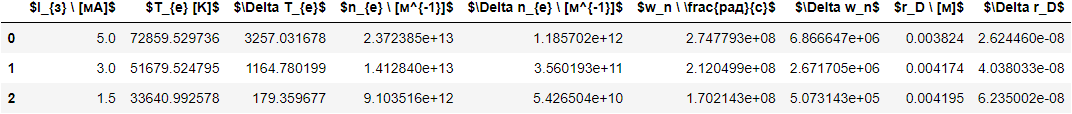

In [603]:
dfi.export(result_data,"result.png")
from IPython import display
display.Image("result.png")

In [604]:
result_data.to_csv("result.csv")